Shape of X: (8114, 100)
Shape of y: (8114,)
Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.5040 - loss: 1.0995 - val_accuracy: 0.7312 - val_loss: 0.6241
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.7574 - loss: 0.5742 - val_accuracy: 0.7657 - val_loss: 0.5655
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.7940 - loss: 0.4896 - val_accuracy: 0.7830 - val_loss: 0.5078
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8342 - loss: 0.4198 - val_accuracy: 0.7793 - val_loss: 0.4890
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.8518 - loss: 0.3723 - val_accuracy: 0.7879 - val_loss: 0.4743
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Accuracy: 0.80
F1 Score: 0.80
Precision: 0.80
Recall: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       159
           1       0.71      0.71      0.71       204
           2       0

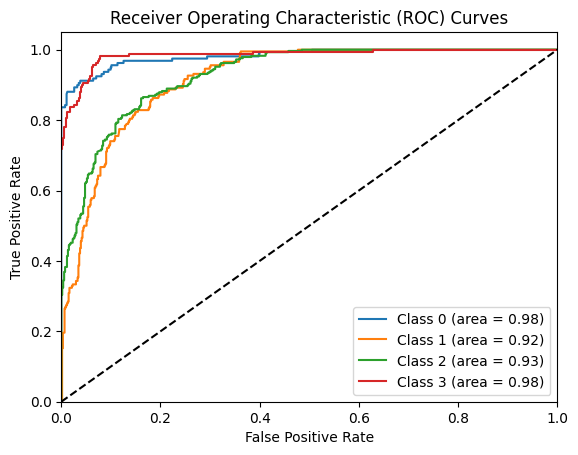

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout, Input, Embedding
from tensorflow.keras.optimizers import Adam

# Load the dataset from an Excel file
file_path = '/content/critical_mixed.csv'
data = pd.read_csv(file_path)

# Fill missing values in 'description' field with an empty string
data['description'] = data['description'].fillna('')

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['description'])
X = tokenizer.texts_to_sequences(data['description'])

# Pad sequences to ensure equal length
X = pad_sequences(X, maxlen=100)

# Print the shape to verify
print("Shape of X:", X.shape)
print("Shape of y:", data['severity'].shape)

# Encode the target variable
y = data['severity']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the CNN model with the specified parameters
def create_model(num_filters=256, learning_rate=0.0005, kernel_size=3, dropout_rate=0.2, dense_units=128):
    model = Sequential([
        Input(shape=(100,)),
        Embedding(input_dim=1000, output_dim=128),
        Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_model(num_filters=256, learning_rate=0.0005, kernel_size=3, dropout_rate=0.2, dense_units=128)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Calculate and plot the ROC-AUC curve for each class
n_classes = len(np.unique(y_encoded))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Binarize the output
    y_test_bin = np.where(y_test == i, 1, 0)
    y_pred_bin = y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_bin)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC-AUC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


Shape of X: (8114, 100)
Shape of y: (8114,)
Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 56s 512ms/step - accuracy: 0.4810 - loss: 1.1420 - val_accuracy: 0.6560 - val_loss: 0.7244
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 51s 504ms/step - accuracy: 0.7150 - loss: 0.6575 - val_accuracy: 0.7164 - val_loss: 0.6418
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 506ms/step - accuracy: 0.7648 - loss: 0.5440 - val_accuracy: 0.7361 - val_loss: 0.5824
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 481ms/step - accuracy: 0.7967 - loss: 0.4902 - val_accuracy: 0.7472 - val_loss: 0.5639
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 85s 507ms/step - accuracy: 0.8181 - loss: 0.4528 - val_accuracy: 0.7583 - val_loss: 0.5449
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
Accuracy: 0.78
F1 Score: 0.77
Precision: 0.78
Recall: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       159
           1       0.70      0.55      0.62       204
           2      

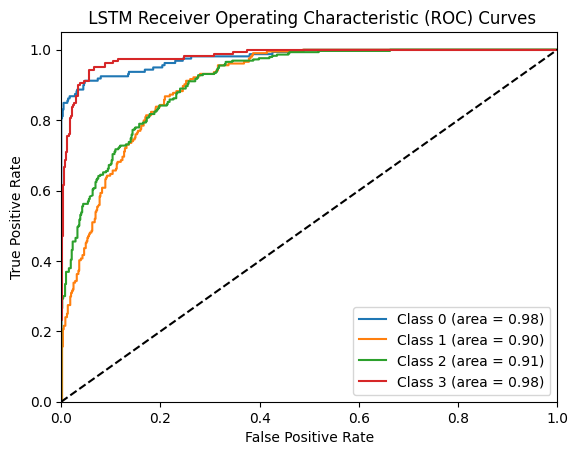

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, Input
from tensorflow.keras.optimizers import Adam

# Load the dataset from an Excel file
file_path = '/content/critical_mixed.csv'
data = pd.read_csv(file_path)

# Fill missing values in 'description' field with an empty string
data['description'] = data['description'].fillna('')

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['description'])
X = tokenizer.texts_to_sequences(data['description'])

# Pad sequences to ensure equal length
X = pad_sequences(X, maxlen=100)

# Print the shape to verify
print("Shape of X:", X.shape)
print("Shape of y:", data['severity'].shape)

# Encode the target variable
y = data['severity']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the LSTM model
def create_lstm_model(learning_rate=0.0005, dropout_rate=0.2, lstm_units=128, dense_units=128):
    model = Sequential([
        Input(shape=(100,)),
        Embedding(input_dim=1000, output_dim=128),
        LSTM(units=lstm_units, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units=lstm_units),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_lstm_model(learning_rate=0.0005, dropout_rate=0.2, lstm_units=128, dense_units=128)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Calculate and plot the ROC-AUC curve for each class
n_classes = len(np.unique(y_encoded))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Binarize the output
    y_test_bin = np.where(y_test == i, 1, 0)
    y_pred_bin = y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_bin)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC-AUC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' LSTM Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


Shape of X: (8114, 100)
Shape of y: (8114,)
Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5017 - loss: 1.0589 - val_accuracy: 0.7287 - val_loss: 0.6273
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7530 - loss: 0.5632 - val_accuracy: 0.7509 - val_loss: 0.5526
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8032 - loss: 0.4683 - val_accuracy: 0.7768 - val_loss: 0.5192
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8397 - loss: 0.3967 - val_accuracy: 0.7891 - val_loss: 0.5019
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8618 - loss: 0.3653 - val_accuracy: 0.7928 - val_loss: 0.4919
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step
Accuracy: 0.80
F1 Score: 0.80
Precision: 0.80
Recall: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       159
           1       0.68      0.70      0.69       204
           2       0.77     

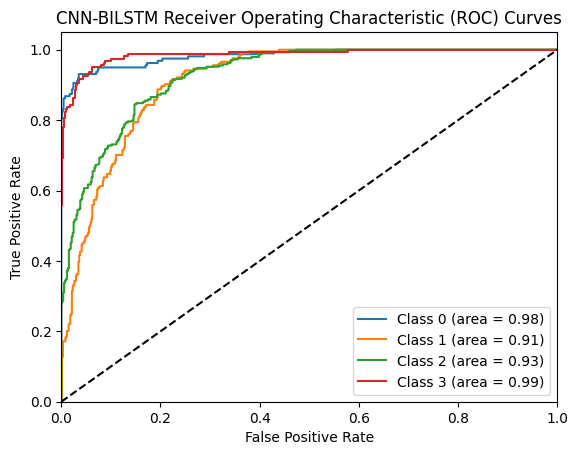

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, Input, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Load the dataset from an Excel file
file_path = '/content/critical_mixed.csv'
data = pd.read_csv(file_path)

# Fill missing values in 'description' field with an empty string
data['description'] = data['description'].fillna('')

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['description'])
X = tokenizer.texts_to_sequences(data['description'])

# Pad sequences to ensure equal length
X = pad_sequences(X, maxlen=100)

# Print the shape to verify
print("Shape of X:", X.shape)
print("Shape of y:", data['severity'].shape)

# Encode the target variable
y = data['severity']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the CNN-BiLSTM model
def create_cnn_bilstm_model(learning_rate=0.0005, dropout_rate=0.2, num_filters=256, kernel_size=3, lstm_units=128, dense_units=128):
    input_layer = Input(shape=(100,))

    embedding_layer = Embedding(input_dim=1000, output_dim=128)(input_layer)

    conv_layer = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
    pooling_layer = GlobalMaxPooling1D()(conv_layer)

    bilstm_layer = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(embedding_layer)
    bilstm_layer = Bidirectional(LSTM(units=lstm_units))(bilstm_layer)

    concatenated = tf.keras.layers.Concatenate()([pooling_layer, bilstm_layer])

    dropout_layer = Dropout(dropout_rate)(concatenated)
    dense_layer = Dense(dense_units, activation='relu')(dropout_layer)
    output_layer = Dense(len(np.unique(y_encoded)), activation='softmax')(dense_layer)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_cnn_bilstm_model(learning_rate=0.0005, dropout_rate=0.2, num_filters=256, kernel_size=3, lstm_units=128, dense_units=128)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Calculate and plot the ROC-AUC curve for each class
n_classes = len(np.unique(y_encoded))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Binarize the output
    y_test_bin = np.where(y_test == i, 1, 0)
    y_pred_bin = y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_bin)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC-AUC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN-BILSTM Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


After balancing using augmentation

[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.5295 - loss: 1.0139 - val_accuracy: 0.7571 - val_loss: 0.5672
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8214 - loss: 0.4520 - val_accuracy: 0.7731 - val_loss: 0.5630
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.8979 - loss: 0.2861 - val_accuracy: 0.7768 - val_loss: 0.6017
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.9315 - loss: 0.1990 - val_accuracy: 0.7731 - val_loss: 0.7045
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.9535 - loss: 0.1338 - val_accuracy: 0.7559 - val_loss: 0.8353
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step
Test Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       169
           1       0.70      0.62      0.66       208
           2       0.72      0.83      0.77       271
           3       0.88      0.89      0.88       164

    accuracy 

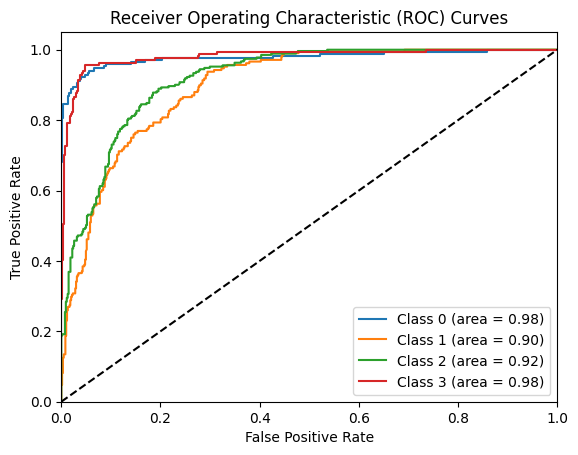

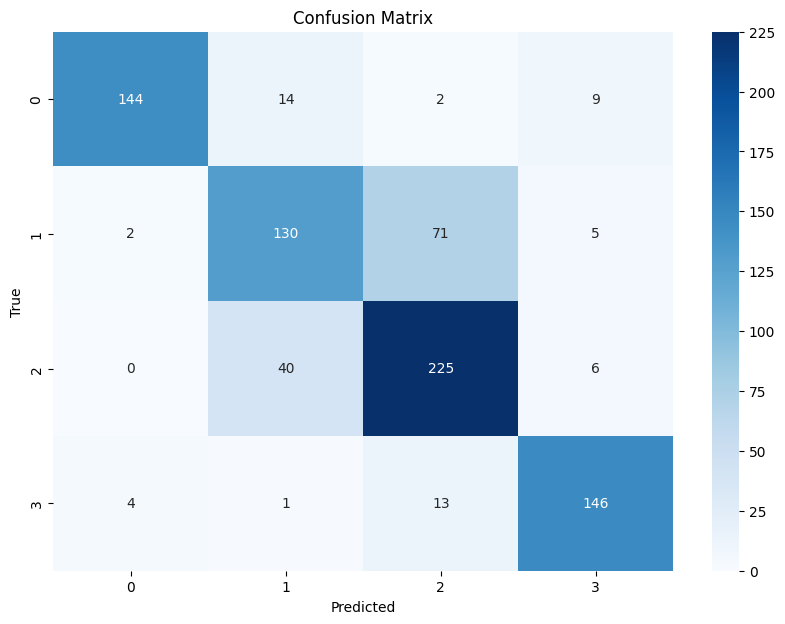

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import random
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

# Load the duplicated data from the Excel file
data = pd.read_csv('/content/critical_mixed.csv')

# Define functions for data augmentation
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def random_insertion(text, n):
    words = text.split()
    for _ in range(n):
        add_word(words)
    return ' '.join(words)

def add_word(words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = words[random.randint(0, len(words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(words) - 1)
    words.insert(random_idx, random_synonym)

def random_deletion(text, p):
    words = text.split()
    if len(words) == 1:
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    if len(new_words) == 0:
        return random.choice(words)
    return ' '.join(new_words)

def augment_text(text):
    augmented_texts = []
    augmented_texts.append(synonym_replacement(text, n=1))
    augmented_texts.append(random_insertion(text, n=1))
    augmented_texts.append(random_deletion(text, p=0.1))
    return augmented_texts

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert to categorical
y = to_categorical(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Augment the training data
augmented_X_train = []
augmented_y_train = []

for i in range(len(X_train)):
    original_text = tokenizer.sequences_to_texts([X_train[i]])[0]
    augmented_texts = augment_text(original_text)
    for aug_text in augmented_texts:
        augmented_X_train.append(aug_text)
        augmented_y_train.append(y_train[i])

# Tokenize and pad the augmented training data
augmented_X_train = tokenizer.texts_to_sequences(augmented_X_train)
augmented_X_train = pad_sequences(augmented_X_train, maxlen=max_length)

# Convert augmented_y_train to numpy array
augmented_y_train = np.array(augmented_y_train)

# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(augmented_X_train, augmented_y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Calculate and plot the ROC-AUC curve for each class
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Class distribution in the balanced training data:
severity
0    2892
1    2892
2    2892
3    2892
Name: count, dtype: int64
Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 877s 7s/step - accuracy: 0.4156 - loss: 1.2291 - val_accuracy: 0.5907 - val_loss: 0.8276
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 921s 7s/step - accuracy: 0.5974 - loss: 0.8318 - val_accuracy: 0.7063 - val_loss: 0.5975
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 928s 7s/step - accuracy: 0.7229 - loss: 0.6162 - val_accuracy: 0.8153 - val_loss: 0.4702
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 932s 7s/step - accuracy: 0.8081 - loss: 0.4963 - val_accuracy: 0.8391 - val_loss: 0.4429
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 923s 7s/step - accuracy: 0.8492 - loss: 0.4130 - val_accuracy: 0.8391 - val_loss: 0.4238
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 907s 7s/step - accuracy: 0.8655 - loss: 0.3680 - val_accuracy: 0.8348 - val_loss: 0.4425
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 877s 7s/step - accuracy: 0.8788 - loss: 0.3340 - val_accuracy: 0.8391 - val_loss: 0.4384
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 912s 7s/step - accuracy: 0.8881 - loss: 0.3123 - val_accu

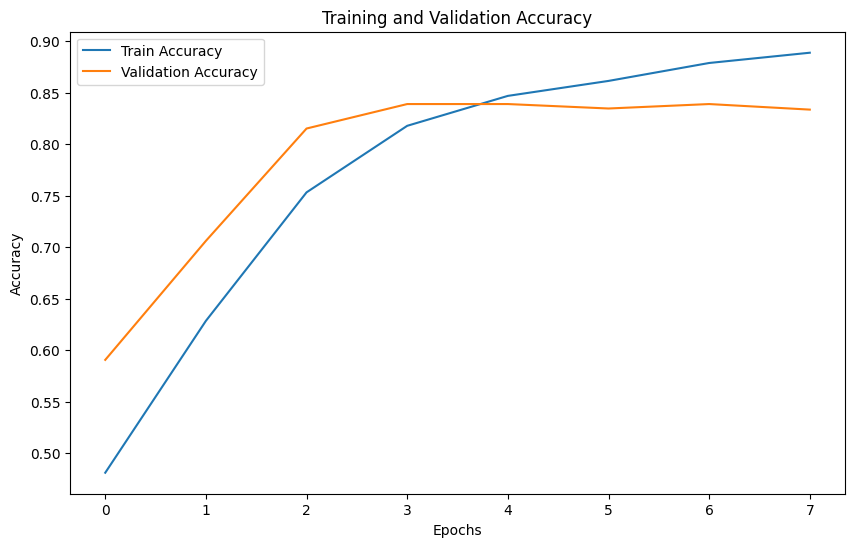

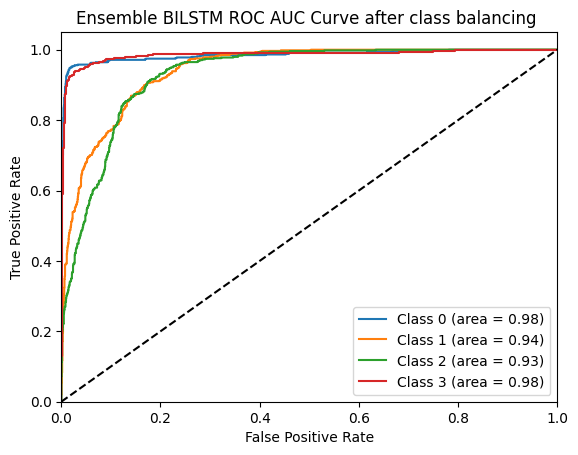

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import random
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

# Load the duplicated data from the Excel file
data = pd.read_csv('/content/critical_mixed.csv')

# Define functions for data augmentation
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_insertion(text, n):
    words = text.split()
    for _ in range(n):
        add_word(words)
    return ' '.join(words)

def add_word(words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = words[random.randint(0, len(words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(words) - 1)
    words.insert(random_idx, random_synonym)

def random_deletion(text, p):
    words = text.split()
    if len(words) == 1:
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    if len(new_words) == 0:
        return random.choice(words)
    return ' '.join(new_words)

def augment_text(text):
    augmented_texts = []
    augmented_texts.append(synonym_replacement(text, n=1))
    augmented_texts.append(random_insertion(text, n=1))
    augmented_texts.append(random_deletion(text, p=0.1))
    return augmented_texts

# Balance training data
max_samples = data['severity'].value_counts().max()
balanced_data = []

for severity, group in data.groupby('severity'):
    while len(group) < max_samples:
        augmented_texts = []
        for index, row in group.iterrows():
            augmented_texts.extend(augment_text(row['description']))
            if len(augmented_texts) >= max_samples - len(group):
                break
        augmented_df = pd.DataFrame({'description': augmented_texts[:max_samples - len(group)], 'severity': severity})
        group = pd.concat([group, augmented_df], ignore_index=True)
    balanced_data.append(group)

balanced_df = pd.concat(balanced_data, ignore_index=True)

# Print class distribution to make sure it is balanced
print("Class distribution in the balanced training data:")
print(balanced_df['severity'].value_counts())

# Save the balanced and augmented training data to a new CSV file
balanced_df.to_csv('/content/augmented_balanced_train_data.csv', index=False)

print("Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv")

# Load the balanced and augmented training data
data = pd.read_csv('/content/augmented_balanced_train_data.csv')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ensemble BILSTM model
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble BILSTM ROC AUC Curve after class balancing ')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/ensemble_bilstm_model.h5')


[nltk_data] Downloading package wordnet to /root/nltk_data...


Class distribution in the balanced training data:
severity
0    2892
1    2892
2    2892
3    2892
Name: count, dtype: int64
Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.3879 - loss: 1.2333 - val_accuracy: 0.5972 - val_loss: 0.8428
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.6102 - loss: 0.8276 - val_accuracy: 0.7516 - val_loss: 0.5910
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.7400 - loss: 0.5978 - val_accuracy: 0.7797 - val_loss: 0.5293
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.7999 - loss: 0.4757 - val_accuracy: 0.8164 - val_loss: 0.4574
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.8394 - loss: 0.4040 - val_accuracy: 0.8251 - val_loss: 0.4703
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.8827 - loss: 0.3330 - val_accuracy: 0.8434 - val_loss: 0.4277
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.9031 - loss: 0.2841 - val_accuracy: 0.8423 - val_loss: 0.4694
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.9053 - loss: 0.2572 - val_accu

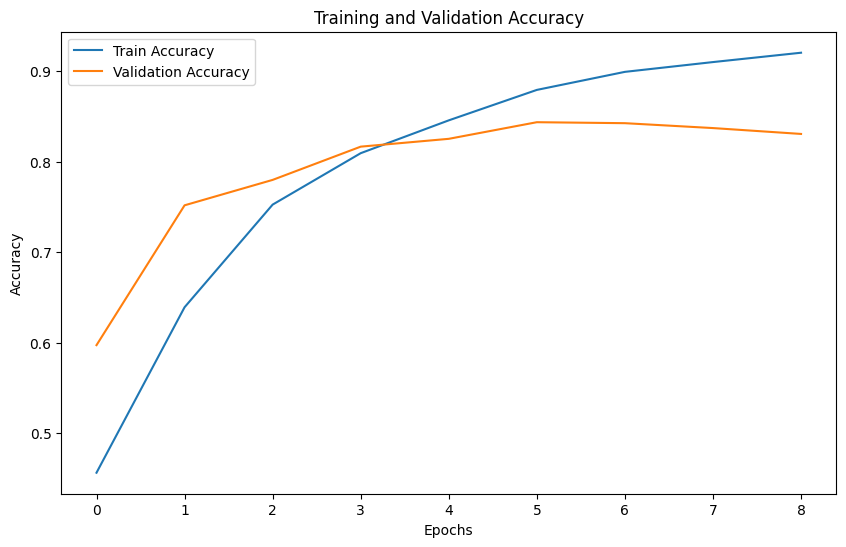

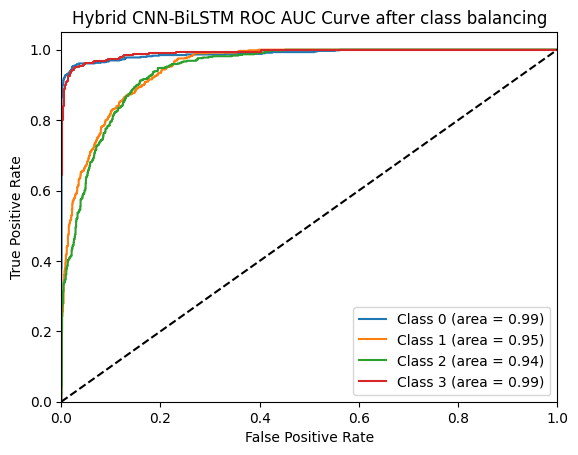

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Input, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import random
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

# Load the duplicated data from the Excel file
data = pd.read_csv('/content/critical_mixed.csv')

# Define functions for data augmentation
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_insertion(text, n):
    words = text.split()
    for _ in range(n):
        add_word(words)
    return ' '.join(words)

def add_word(words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = words[random.randint(0, len(words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(words) - 1)
    words.insert(random_idx, random_synonym)

def random_deletion(text, p):
    words = text.split()
    if len(words) == 1:
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    if len(new_words) == 0:
        return random.choice(words)
    return ' '.join(new_words)

def augment_text(text):
    augmented_texts = []
    augmented_texts.append(synonym_replacement(text, n=1))
    augmented_texts.append(random_insertion(text, n=1))
    augmented_texts.append(random_deletion(text, p=0.1))
    return augmented_texts

# Balance training data
max_samples = data['severity'].value_counts().max()
balanced_data = []

for severity, group in data.groupby('severity'):
    while len(group) < max_samples:
        augmented_texts = []
        for index, row in group.iterrows():
            augmented_texts.extend(augment_text(row['description']))
            if len(augmented_texts) >= max_samples - len(group):
                break
        augmented_df = pd.DataFrame({'description': augmented_texts[:max_samples - len(group)], 'severity': severity})
        group = pd.concat([group, augmented_df], ignore_index=True)
    balanced_data.append(group)

balanced_df = pd.concat(balanced_data, ignore_index=True)

# Print class distribution to make sure it is balanced
print("Class distribution in the balanced training data:")
print(balanced_df['severity'].value_counts())

# Save the balanced and augmented training data to a new CSV file
balanced_df.to_csv('/content/augmented_balanced_train_data.csv', index=False)

print("Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv")

# Load the balanced and augmented training data
data = pd.read_csv('/content/augmented_balanced_train_data.csv')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Hybrid CNN-BiLSTM model
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
    model.add(Conv1D(128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid CNN-BiLSTM ROC AUC Curve after class balancing')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/hybrid_cnn_bilstm_model.h5')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Class distribution in the balanced training data:
severity
0    2892
1    2892
2    2892
3    2892
Name: count, dtype: int64
Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.4237 - loss: 1.1990 - val_accuracy: 0.6879 - val_loss: 0.6952
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.6906 - loss: 0.6830 - val_accuracy: 0.7138 - val_loss: 0.6224
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.7724 - loss: 0.5305 - val_accuracy: 0.7894 - val_loss: 0.4887
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8400 - loss: 0.3840 - val_accuracy: 0.8283 - val_loss: 0.4388
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.8780 - loss: 0.3135 - val_accuracy: 0.8326 - val_loss: 0.4457
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9211 - loss: 0.2168 - val_accuracy: 0.8272 - val_loss: 0.5252
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9304 - loss: 0.1846 - val_accuracy: 0.8369 - val_loss: 0.5137
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.9522 - loss: 0.1371 - val_accuracy: 0.8337 - 

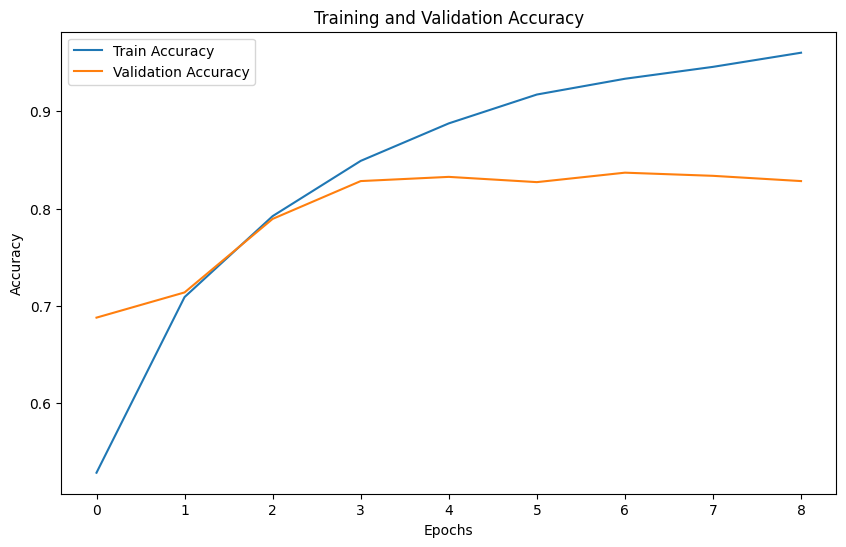

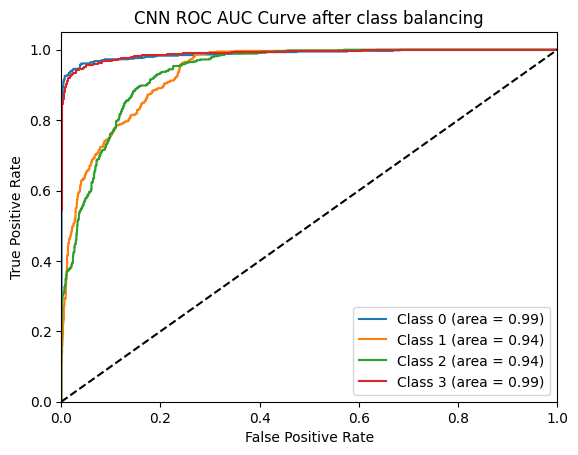

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import random
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

# Load the duplicated data from the Excel file
data = pd.read_csv('/content/critical_mixed.csv')

# Define functions for data augmentation
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_insertion(text, n):
    words = text.split()
    for _ in range(n):
        add_word(words)
    return ' '.join(words)

def add_word(words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = words[random.randint(0, len(words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(words) - 1)
    words.insert(random_idx, random_synonym)

def random_deletion(text, p):
    words = text.split()
    if len(words) == 1:
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    if len(new_words) == 0:
        return random.choice(words)
    return ' '.join(new_words)

def augment_text(text):
    augmented_texts = []
    augmented_texts.append(synonym_replacement(text, n=1))
    augmented_texts.append(random_insertion(text, n=1))
    augmented_texts.append(random_deletion(text, p=0.1))
    return augmented_texts

# Balance training data
max_samples = data['severity'].value_counts().max()
balanced_data = []

for severity, group in data.groupby('severity'):
    while len(group) < max_samples:
        augmented_texts = []
        for index, row in group.iterrows():
            augmented_texts.extend(augment_text(row['description']))
            if len(augmented_texts) >= max_samples - len(group):
                break
        augmented_df = pd.DataFrame({'description': augmented_texts[:max_samples - len(group)], 'severity': severity})
        group = pd.concat([group, augmented_df], ignore_index=True)
    balanced_data.append(group)

balanced_df = pd.concat(balanced_data, ignore_index=True)

# Print class distribution to make sure it is balanced
print("Class distribution in the balanced training data:")
print(balanced_df['severity'].value_counts())

# Save the balanced and augmented training data to a new CSV file
balanced_df.to_csv('/content/augmented_balanced_train_data.csv', index=False)

print("Data augmentation and balancing complete. Saved to /content/augmented_balanced_train_data.csv")

# Load the balanced and augmented training data
data = pd.read_csv('/content/augmented_balanced_train_data.csv')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with new hyperparameters
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=7000, output_dim=256, input_length=max_length))
    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.6))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC AUC Curve after class balancing')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/cnn_model.h5')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.3824 - loss: 1.2682 - val_accuracy: 0.6308 - val_loss: 0.8846
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.6026 - loss: 0.8068 - val_accuracy: 0.6692 - val_loss: 0.7217
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6879 - loss: 0.6214 - val_accuracy: 0.6738 - val_loss: 0.6932
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7378 - loss: 0.5022 - val_accuracy: 0.7277 - val_loss: 0.6113
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8029 - loss: 0.4080 - val_accuracy: 0.7415 - val_loss: 0.6227
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Test Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       339
           1       0.59      0.69      0.64       423
           2       0.75      0.68      0.71       546
           3       0.84      0.87      0.86       315

    accuracy            

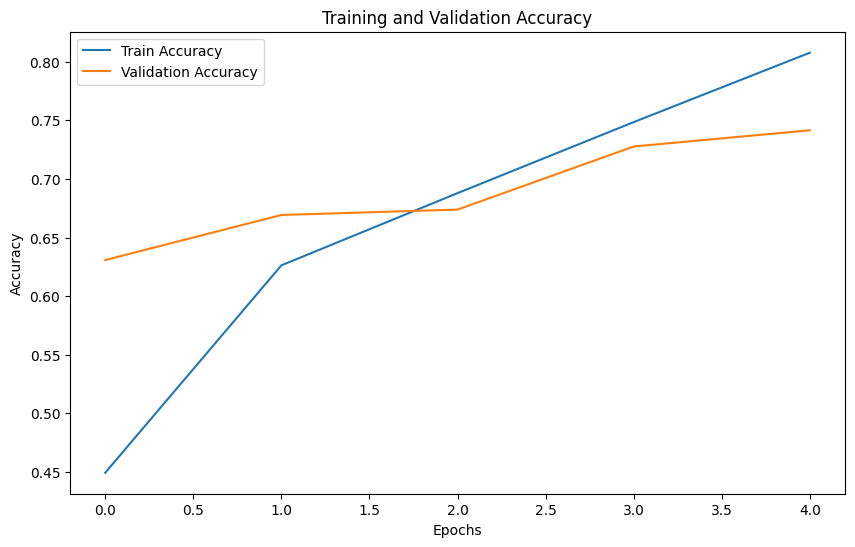

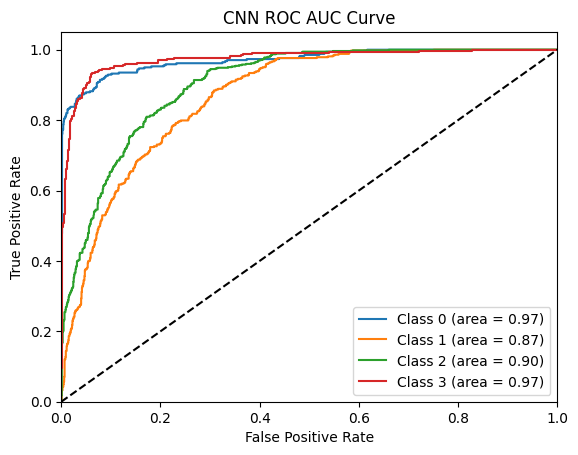

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import nltk

nltk.download('wordnet')

# Load the data from the CSV file
data = pd.read_csv('/content/critical_mixed.csv')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with new hyperparameters
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=7000, output_dim=256, input_length=max_length))
    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.6))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/cnn_model.h5')


[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.3817 - loss: 1.2467 - val_accuracy: 0.6631 - val_loss: 0.7555
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6502 - loss: 0.7018 - val_accuracy: 0.6246 - val_loss: 0.7378
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6968 - loss: 0.5761 - val_accuracy: 0.7092 - val_loss: 0.6256
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7626 - loss: 0.4634 - val_accuracy: 0.7262 - val_loss: 0.6313
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8209 - loss: 0.3800 - val_accuracy: 0.7446 - val_loss: 0.6097
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8601 - loss: 0.3298 - val_accuracy: 0.7585 - val_loss: 0.6548
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9024 - loss: 0.2386 - val_accuracy: 0.7538 - val_loss: 0.7043
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9286 - loss: 0.1802 - val_accuracy: 0.7538 -

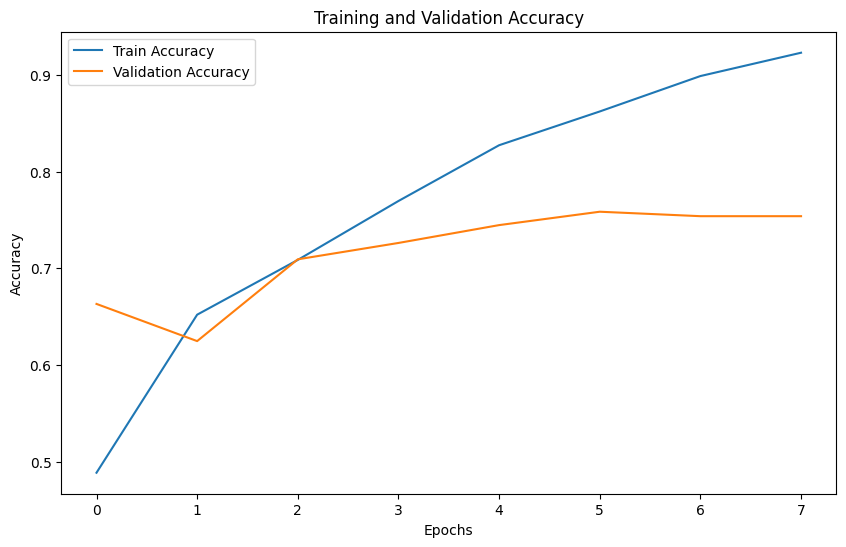

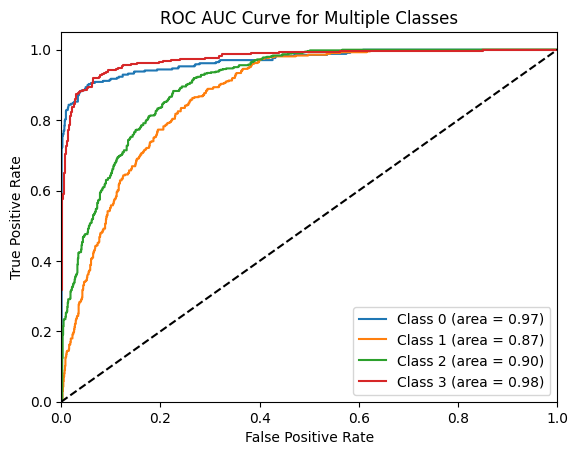

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import nltk

nltk.download('wordnet')

# Load the data from the CSV file
data = pd.read_csv('/content/critical_mixed.csv')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with new hyperparameters
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=7000, output_dim=128, input_length=max_length))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve for multiple classes
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Multiple Classes')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/cnn_model.h5')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.3843 - loss: 1.2405 - val_accuracy: 0.6545 - val_loss: 0.7706
Epoch 2/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6254 - loss: 0.7397 - val_accuracy: 0.6632 - val_loss: 0.6962
Epoch 3/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7226 - loss: 0.5425 - val_accuracy: 0.6736 - val_loss: 0.7009
Epoch 4/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7855 - loss: 0.4155 - val_accuracy: 0.7033 - val_loss: 0.6859
Epoch 5/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8521 - loss: 0.3208 - val_accuracy: 0.7312 - val_loss: 0.7241
Epoch 6/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8910 - loss: 0.2323 - val_accuracy: 0.7173 - val_loss: 0.8245
Epoch 7/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9259 - loss: 0.1737 - val_accuracy: 0.6998 - val_loss: 0.9451
Epoch 8/8
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9409 - loss: 0.1364 - val_accuracy: 0.6894 - val_los

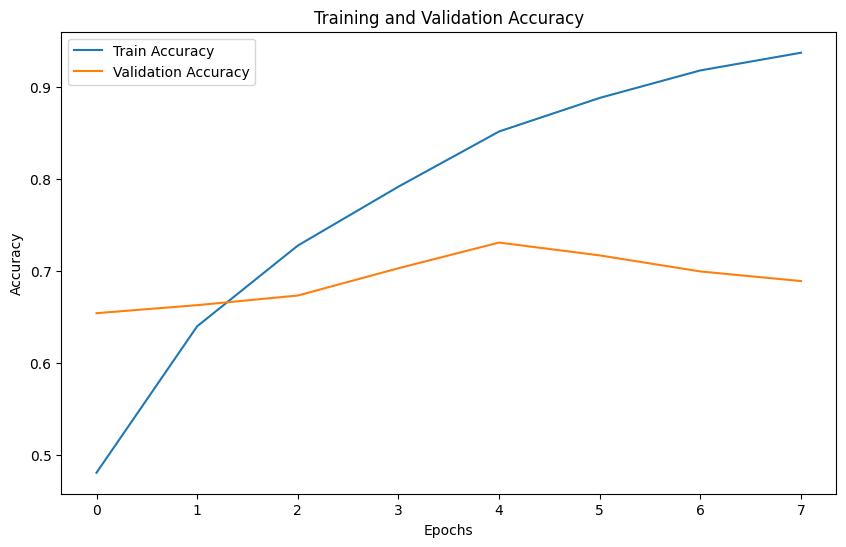

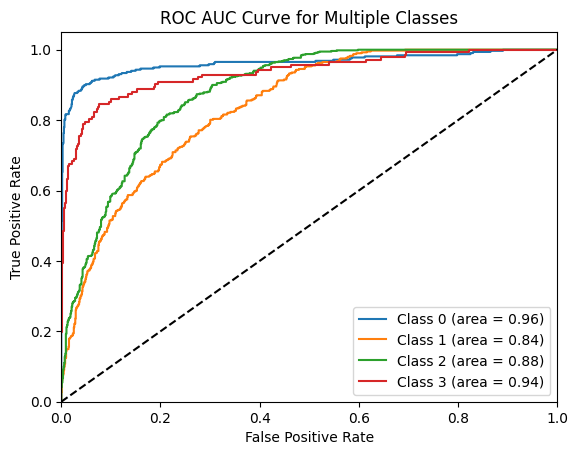

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import nltk

nltk.download('wordnet')

# Load the data from the CSV file
data = pd.read_excel('/content/mixed.xlsx')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with new hyperparameters
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=8000, output_dim=100, input_length=max_length))
    model.add(Conv1D(50, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(25, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=8, batch_size=100, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve for multiple classes
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Multiple Classes')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/cnn_model.h5')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.5128 - loss: 1.1114 - val_accuracy: 0.6597 - val_loss: 0.7472
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6621 - loss: 0.7271 - val_accuracy: 0.6440 - val_loss: 0.8130
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7421 - loss: 0.5957 - val_accuracy: 0.7120 - val_loss: 0.6582
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.7940 - loss: 0.4621 - val_accuracy: 0.7330 - val_loss: 0.6281
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8421 - loss: 0.3844 - val_accuracy: 0.7277 - val_loss: 0.6657
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.8680 - loss: 0.3185 - val_accuracy: 0.7382 - val_loss: 0.7023
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9137 - loss: 0.2187 - val_accuracy: 0.7120 - val_loss: 0.7805
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Test Classification Report:

              precision    recall  f1-score   suppo

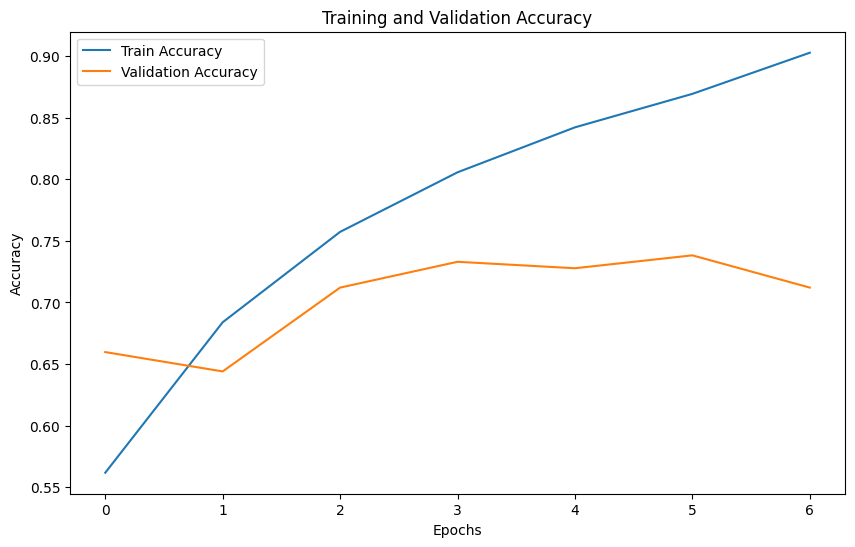

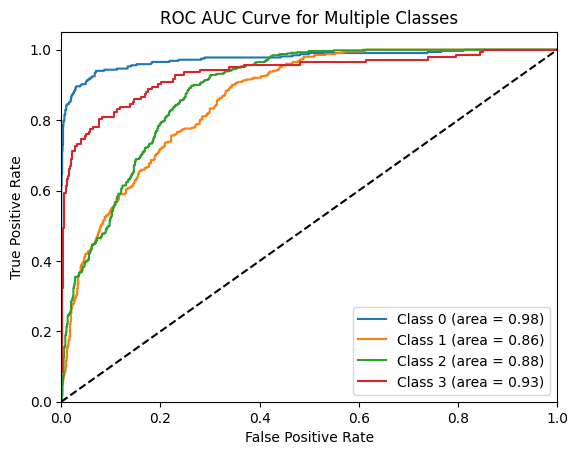

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import nltk

nltk.download('wordnet')

# Load the data from the CSV file
data = pd.read_excel('/content/mixed.xlsx')

# Extract features and labels
X = data['description'].values
y = data['severity'].values

# Tokenization
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

# Convert to categorical
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model with new hyperparameters
def create_model():
    model = Sequential()
    model.add(Input(shape=(max_length,)))
    model.add(Embedding(input_dim=8000, output_dim=100, input_length=max_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], class_weight=class_weights)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report for test data
target_names = label_encoder.classes_.astype(str)
print("Test Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot ROC AUC curve for multiple classes
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Multiple Classes')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/lstm_model.h5')
